<h1 style="text-align: center;"><a href="https://www.whatwouldaithink.com">WhatWouldAiThink.com</a></h1>


<h3 style="text-align: center;">Classification of Cats and Dogs</h3>

<h3 style="text-align: center;">April 2024</h3>

<h3 style="text-align: center;">This notebook is made for the analysis of cats and dogs published on:
<a href="https://www.whatwouldaithink.com">whatwouldaithink.com</a></h3>
<h4 style="text-align: center;">Copyright © 2022-Present whatwouldaithink.com - All Rights Reserved</h4>

 <h1 style="text-align: center;"> Do prediction with pretrained EfficientNetB0, DenseNet201, ResNet152 and ConvNextLarge models </h1>

In [1]:
# import basics
import os
import warnings
warnings.filterwarnings("ignore")

# import torch
import torch
from random import randrange
torch.manual_seed(0)

# import torch models
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision.models import densenet201, DenseNet201_Weights
from torchvision.models import resnet152, ResNet152_Weights
from torchvision.models import convnext_large, ConvNeXt_Large_Weights

# custom modules
import sys
sys.path.append('..')
from vision.Utils import info
from vision.Definitions import *
from vision.Utils import printNumOfLearnableWeights
from vision.Utils import readDataToDataFrame, createDirectories
from vision.TransformImages import TransformImages
from vision.Data import Data
from vision.ValidationTools import MyValidator, ValidatePretrainedModel
# MIN_SIZE_IMAGE is 224, defined in vision.Definitions

pathDataSet = "datasets"
pathDataSet224x224 = f"datasets{MIN_SIZE_IMAGE[0]}x{MIN_SIZE_IMAGE[1]}"

<h1>1. Check and preprocess the data</h1>

### Create the DataFrames

In [2]:
# "training_set" and "test_set" are from https://www.kaggle.com/datasets/charmz/cats-and-dogs
df_train = readDataToDataFrame(os.path.join(pathDataSet, "training_set"))
df_test = readDataToDataFrame(os.path.join(pathDataSet, "test_set"))

# "validate_set" and "validate_set_cropped" are from https://github.com/WhatWouldAiThink/About_Cats_in_Montenegro
df_validate = readDataToDataFrame(os.path.join(pathDataSet, "validate_set"))
df_validateCropped = readDataToDataFrame(os.path.join(pathDataSet, "validate_set_cropped"))

Reading files from folder: datasets/training_set/cats
Reading files from folder: datasets/training_set/dogs
Reading files from folder: datasets/test_set/cats
Reading files from folder: datasets/test_set/dogs
Reading files from folder: datasets/validate_set/cats
Reading files from folder: datasets/validate_set_cropped/cats


### Create the DataSets

In [3]:
dataSetTrain = Data(df_train)
dataSetTest = Data(df_test)
dataSetValidate = Data(df_validate)
dataSetValidateCropped = Data(df_validateCropped)

### Plot images for all DataSets to get an idea of the data.

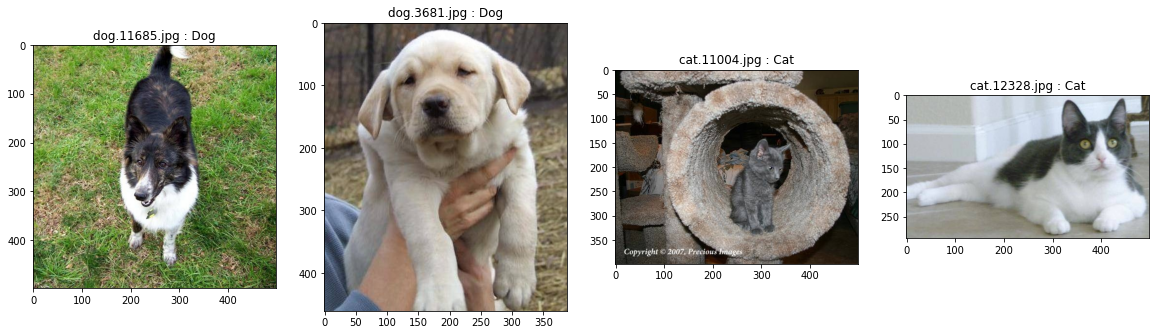

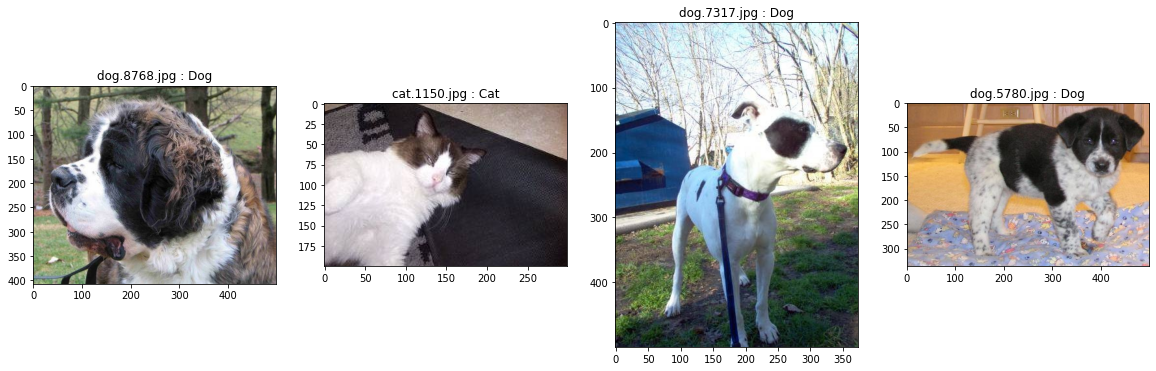

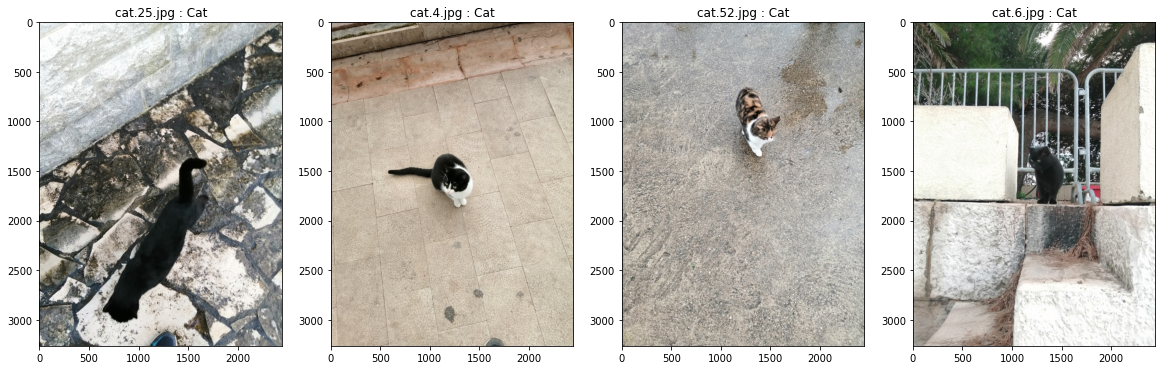

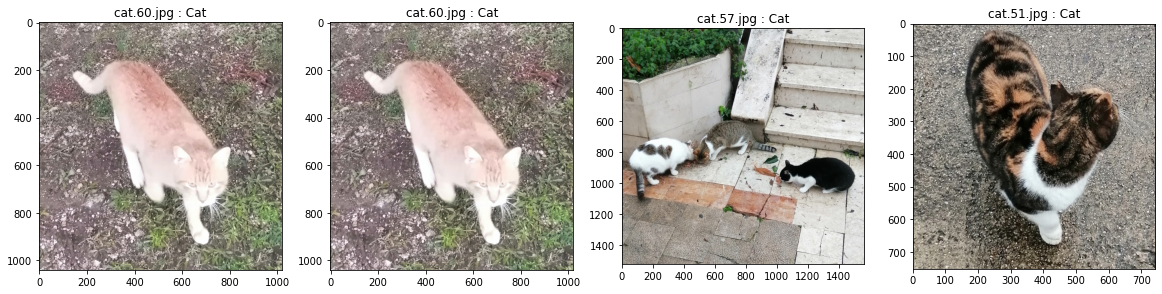

In [4]:
for dataSet in [dataSetTrain, dataSetTest, dataSetValidate, dataSetValidateCropped]:
    rows = dataSet.__len__()
    dataSet.plotImages([randrange(0, rows) for _ in range(4)])

<h1>2. Fliter the data </h1>

### Create a new directory and resize the images to MIN_SIZE_IMAGE

In [5]:
# create a new directory with subfolders for images with size MIN_SIZE_IMAGE
folders = ["training_set", 
           "test_set", 
           "validate_set", 
           "validate_set_cropped"]
    
# resize the images and save it in the new directory             
if createDirectories(pathDataSet224x224, folders):
    print(f"Resizing images")
    transformer = TransformImages(pathDataSet, pathDataSet224x224, resize=True, size=MIN_SIZE_IMAGE)
    transformer.resize() 

created directory: datasets224x224/training_set/cats
created directory: datasets224x224/training_set/dogs
created directory: datasets224x224/test_set/cats
created directory: datasets224x224/test_set/dogs
created directory: datasets224x224/validate_set/cats
created directory: datasets224x224/validate_set/dogs
created directory: datasets224x224/validate_set_cropped/cats
created directory: datasets224x224/validate_set_cropped/dogs
Resizing images


### Create a new dataframe with equal image size MIN_SIZE_IMAGE

In [6]:
df_train    = readDataToDataFrame(os.path.join(pathDataSet224x224, "training_set"))
df_test     = readDataToDataFrame(os.path.join(pathDataSet224x224, "test_set"))
df_validate = readDataToDataFrame(os.path.join(pathDataSet224x224, "validate_set"))
df_validateCropped = readDataToDataFrame(os.path.join(pathDataSet224x224, "validate_set_cropped"))

Reading files from folder: datasets224x224/training_set/cats
Reading files from folder: datasets224x224/training_set/dogs
Reading files from folder: datasets224x224/test_set/cats
Reading files from folder: datasets224x224/test_set/dogs
Reading files from folder: datasets224x224/validate_set/cats
Reading files from folder: datasets224x224/validate_set_cropped/cats


### Check the new data frames. We see that all small images have equal size of 224x224 pixel.

In [7]:
df_train.describe()

,label,width,height
count,17650.000000,17650.0,17650.0
mean,0.499150,224.0,224.0
std,0.500013,0.0,0.0
min,0.000000,224.0,224.0
25%,0.000000,224.0,224.0
50%,0.000000,224.0,224.0
75%,1.000000,224.0,224.0
max,1.000000,224.0,224.0


In [8]:
df_test.describe()

,label,width,height
count,4395.000000,4395.0,4395.0
mean,0.500114,224.0,224.0
std,0.500057,0.0,0.0
min,0.000000,224.0,224.0
25%,0.000000,224.0,224.0
50%,1.000000,224.0,224.0
75%,1.000000,224.0,224.0
max,1.000000,224.0,224.0


In [9]:
df_validate.describe()

,label,width,height
count,61.0,61.0,61.0
mean,1.0,224.0,224.0
std,0.0,0.0,0.0
min,1.0,224.0,224.0
25%,1.0,224.0,224.0
50%,1.0,224.0,224.0
75%,1.0,224.0,224.0
max,1.0,224.0,224.0


In [10]:
df_validateCropped.describe()

,label,width,height
count,61.0,61.0,61.0
mean,1.0,224.0,224.0
std,0.0,0.0,0.0
min,1.0,224.0,224.0
25%,1.0,224.0,224.0
50%,1.0,224.0,224.0
75%,1.0,224.0,224.0
max,1.0,224.0,224.0


### Create a new DataSets with equal image size MIN_SIZE_IMAGE

In [11]:
dataSetTrain = Data(df_train)
dataSetTest = Data(df_test)
dataSetValidate = Data(df_validate)
dataSetValidateCropped = Data(df_validateCropped)

### Count the number of cats and dogs in the train and test set. Both set's are almost balanced.

In [12]:
for (df, nameDataFrame) in zip([df_train, df_test], ["train", "test"]):
    for label in [0, 1]:
        print(f"There are {df[df['label'] == label].shape[0]} {labelDic[label]}s in the {nameDataFrame} set.")


There are 8840 Dogs in the train set.
There are 8810 Cats in the train set.
There are 2197 Dogs in the test set.
There are 2198 Cats in the test set.


### Define all labels that belong to the category of cats

In [13]:
# all cats i found within the 1000 classes, see https://www.image-net.org/challenges/LSVRC/2017/browse-synsets.php
category_cats = ["Siamese cat",
                 "Siamese",
                 "Egyptian cat", 
                 "Persian cat", 
                 "tiger cat",
                 "tabby",
                 "tabby_cat", 
                 "Angora", 
                 "Madagascar cat"]

# we do binary classification
# every category which is in category_cats be handled as class 1
# any other category will be handled as class 0
dicLabels={0: "Other", 1: "Cat"}

<h1>3. Create a pretrained EfficientNet_B0 model </h1>

In [14]:
validateEfficientNetB0 = ValidatePretrainedModel(model=efficientnet_b0, 
                                            weights=EfficientNet_B0_Weights.DEFAULT, 
                                            category=category_cats)

Number of trainable weights: 5288548
model size: 20.335MB


### Test the pretrained EfficientNet_B0 model with the test data

Confusion Matrix: [[2196    1]
 [ 414 1784]]
Found    2196    images classified as trueOther  in 4395 images.
Found     1      images classified as falseCat   in 4395 images.
Found    414     images classified as falseOther in 4395 images.
Found    1784    images classified as trueCat    in 4395 images.


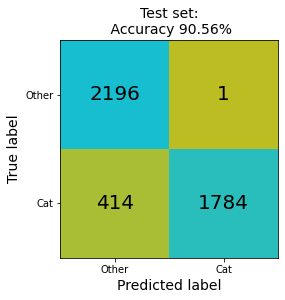

In [15]:
validateEfficientNetB0.predict(dataFrame=df_test, dicLabels=dicLabels)
validateEfficientNetB0.plotConfusionMatrix("Test set", "ConfusionMatrixTestSetPretrainedEfficientNetB0")

### Validate the pretrained EfficientNet_B0 model with the validation data

Confusion Matrix: [[ 0  0]
 [60  1]]
Found     0      images classified as trueOther  in 61 images.
Found     0      images classified as falseCat   in 61 images.
Found     60     images classified as falseOther in 61 images.
Found     1      images classified as trueCat    in 61 images.


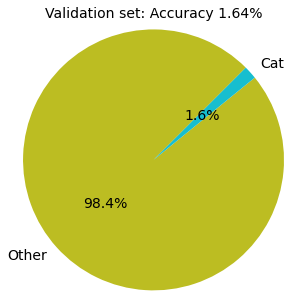

In [16]:
validateEfficientNetB0.predict(dataFrame=df_validate, dicLabels=dicLabels)
validateEfficientNetB0.plotPie("Validation set", "PieChartValiSetPretrainedEfficientNetB0")

Confusion Matrix: [[ 0  0]
 [30 31]]
Found     0      images classified as trueOther  in 61 images.
Found     0      images classified as falseCat   in 61 images.
Found     30     images classified as falseOther in 61 images.
Found     31     images classified as trueCat    in 61 images.


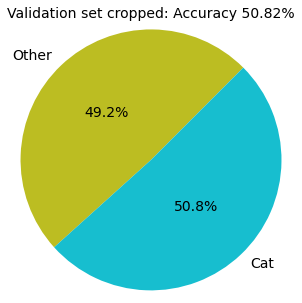

In [17]:
validateEfficientNetB0.predict(dataFrame=df_validateCropped, dicLabels=dicLabels)
validateEfficientNetB0.plotPie("Validation set cropped", "PieChartValiSetCroppedPretrainedEfficientNetB0")

<h1>5. Create a pretrained DenseNet201 model </h1>

In [18]:
validateDenseNet201 = ValidatePretrainedModel(model=densenet201, 
                                            weights=DenseNet201_Weights.DEFAULT, 
                                            category=category_cats)

Number of trainable weights: 20013928
model size: 77.222MB


### Test the pretrained DenseNet201 model with the test data

Confusion Matrix: [[2197    0]
 [ 484 1714]]
Found    2197    images classified as trueOther  in 4395 images.
Found     0      images classified as falseCat   in 4395 images.
Found    484     images classified as falseOther in 4395 images.
Found    1714    images classified as trueCat    in 4395 images.


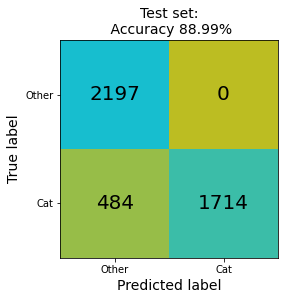

In [19]:
validateDenseNet201.predict(dataFrame=df_test, dicLabels=dicLabels)
validateDenseNet201.plotConfusionMatrix("Test set", "ConfusionMatrixTestSetPretrainedDenseNet201")

### Validate the pretrained DenseNet201 model with the validation data

Confusion Matrix: [[ 0  0]
 [61  0]]
Found     0      images classified as trueOther  in 61 images.
Found     0      images classified as falseCat   in 61 images.
Found     61     images classified as falseOther in 61 images.
Found     0      images classified as trueCat    in 61 images.


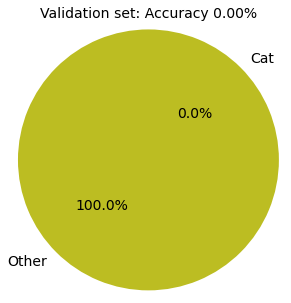

In [20]:
validateDenseNet201.predict(dataFrame=df_validate, dicLabels=dicLabels)
validateDenseNet201.plotPie("Validation set", "PieChartValiSetPretrainedDenseNet201")

Confusion Matrix: [[ 0  0]
 [34 27]]
Found     0      images classified as trueOther  in 61 images.
Found     0      images classified as falseCat   in 61 images.
Found     34     images classified as falseOther in 61 images.
Found     27     images classified as trueCat    in 61 images.


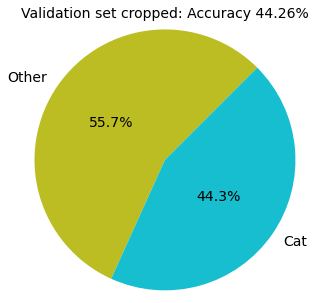

In [21]:
validateDenseNet201.predict(dataFrame=df_validateCropped, dicLabels=dicLabels)
validateDenseNet201.plotPie("Validation set cropped", "PieChartValiSetCroppedPretrainedDenseNet201")

<h1>6. Create a pretrained ResNet152 model </h1>

In [22]:
validateResNet152 = ValidatePretrainedModel(model=resnet152, 
                                            weights=ResNet152_Weights.DEFAULT, 
                                            category=category_cats)

Number of trainable weights: 60192808
model size: 230.196MB


### Test the pretrained ResNet152 model with the test data

Confusion Matrix: [[2196    1]
 [ 352 1846]]
Found    2196    images classified as trueOther  in 4395 images.
Found     1      images classified as falseCat   in 4395 images.
Found    352     images classified as falseOther in 4395 images.
Found    1846    images classified as trueCat    in 4395 images.


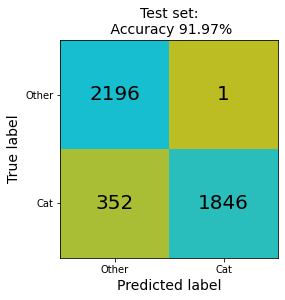

In [23]:
validateResNet152.predict(dataFrame=df_test, dicLabels=dicLabels)
validateResNet152.plotConfusionMatrix("Test set", "ConfusionMatrixTestSetPretrainedResNet152")

### Validate the pretrained ResNet152 model with the validation data

Confusion Matrix: [[ 0  0]
 [58  3]]
Found     0      images classified as trueOther  in 61 images.
Found     0      images classified as falseCat   in 61 images.
Found     58     images classified as falseOther in 61 images.
Found     3      images classified as trueCat    in 61 images.


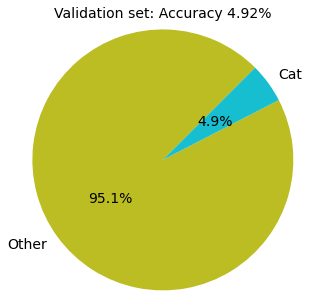

In [24]:
validateResNet152.predict(dataFrame=df_validate, dicLabels=dicLabels)
validateResNet152.plotPie("Validation set", "PieChartValiSetPretrainedResNet152")

Confusion Matrix: [[ 0  0]
 [28 33]]
Found     0      images classified as trueOther  in 61 images.
Found     0      images classified as falseCat   in 61 images.
Found     28     images classified as falseOther in 61 images.
Found     33     images classified as trueCat    in 61 images.


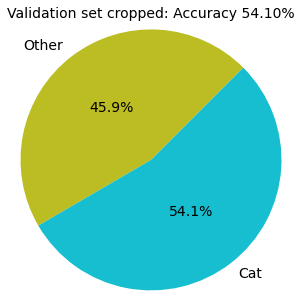

In [25]:
validateResNet152.predict(dataFrame=df_validateCropped, dicLabels=dicLabels)
validateResNet152.plotPie("Validation set cropped", "PieChartValiSetCroppedPretrainedResNet152")

<h1>7. Create a pretrained ConvNext_Large model </h1>

In [26]:
validateConvNextLarge = ValidatePretrainedModel(model=convnext_large, 
                                                weights=ConvNeXt_Large_Weights.DEFAULT, 
                                                category=category_cats)

Number of trainable weights: 197767336
model size: 754.423MB


### Test the pretrained ConvNext_Large model with the test data

Confusion Matrix: [[2197    0]
 [ 332 1866]]
Found    2197    images classified as trueOther  in 4395 images.
Found     0      images classified as falseCat   in 4395 images.
Found    332     images classified as falseOther in 4395 images.
Found    1866    images classified as trueCat    in 4395 images.


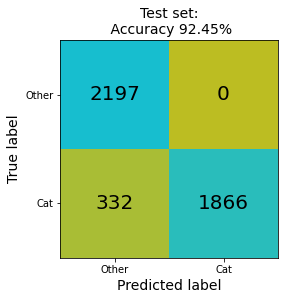

In [27]:
validateConvNextLarge.predict(dataFrame=df_test, dicLabels=dicLabels)
validateConvNextLarge.plotConfusionMatrix("Test set", "ConfusionMatrixTestSetPretrainedConvNextLarge")

### Validate the pretrained ConvNext_Large model with the validation data

Confusion Matrix: [[ 0  0]
 [57  4]]
Found     0      images classified as trueOther  in 61 images.
Found     0      images classified as falseCat   in 61 images.
Found     57     images classified as falseOther in 61 images.
Found     4      images classified as trueCat    in 61 images.


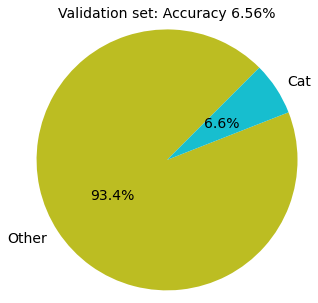

In [28]:
validateConvNextLarge.predict(dataFrame=df_validate, dicLabels=dicLabels)
validateConvNextLarge.plotPie("Validation set", "PieChartValiSetPretrainedConvNextLarge")

Confusion Matrix: [[ 0  0]
 [20 41]]
Found     0      images classified as trueOther  in 61 images.
Found     0      images classified as falseCat   in 61 images.
Found     20     images classified as falseOther in 61 images.
Found     41     images classified as trueCat    in 61 images.


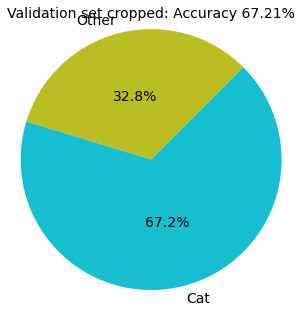

In [29]:
validateConvNextLarge.predict(dataFrame=df_validateCropped, dicLabels=dicLabels)
validateConvNextLarge.plotPie("Validation set cropped", "PieChartValiSetCroppedPretrainedConvNextLarge")